<a href="https://colab.research.google.com/github/AliEbadi110/Natural-Language-Processing-Text-Classification-Sample-Projects/blob/main/NLP_NLTK_Text_Classification_Sentiment_Analysis_VADER_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP - NLTK - Text Classification - Sentiment Analysis -  VADER - Movie Reviews**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## 1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


## 2. Data Overview

In [ ]:
df.shape

(2000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
label,2000,2,neg,1000
review,1965,1939,,27


## 3. Target Variable Preprocessing

In [ ]:
df.label.describe()

count     2000
unique       2
top        neg
freq      1000
Name: label, dtype: object

In [ ]:
df.label.value_counts()

neg    1000
pos    1000
Name: label, dtype: int64

<Axes: xlabel='count', ylabel='label'>

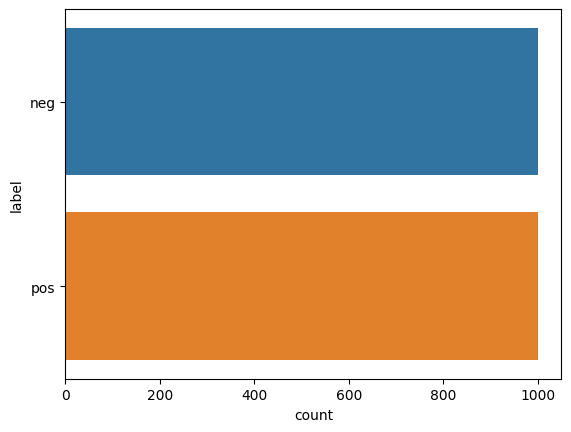

In [ ]:
sns.countplot(data=df, y='label')

In [ ]:
df.label.isnull().sum()

0

## 4. Handling Missing Values

In [ ]:
df.isnull().sum()

label      0
review    35
dtype: int64

<Axes: >

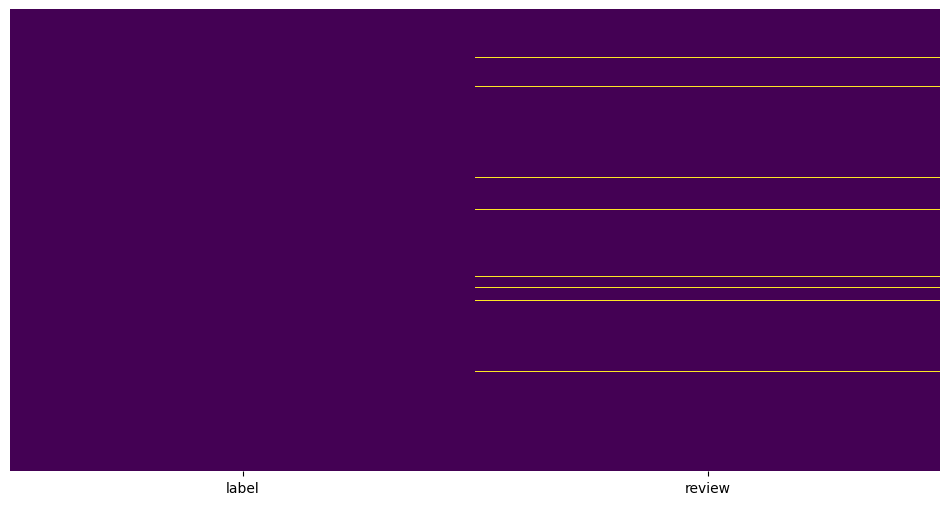

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df.dropna(inplace=True)

In [ ]:
blanks = []

# (index, label, review)
for i, lb, rv in df.itertuples():
  if rv.isspace():
    blanks.append(i)

In [ ]:
df.drop(blanks, inplace=True)

## 5. Feature Extraction, Predict

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
df.iloc[0]['review']

'how do films like mouse hunt get into theatres ? \r\nisn\'t there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg\'s dreamworks studio is hollywood family fare at its deadly worst . \r\nmouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . \r\nwriter adam rifkin and director gore verbinski are the names chiefly responsible for this swill . \r\nthe plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . \r\ndeciding to check out the long-abandoned house , they soon learn that it\'s worth a fortune and set about selling it in auction to the highest bidder . \r\nbut battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . \r\

In [ ]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'compound': -0.9125}

In [ ]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [ ]:
df.head()

,label,review,scores
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co..."
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com..."
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com..."
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co..."
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co..."


In [ ]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [ ]:
df.head()

,label,review,scores,compound
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484


In [ ]:
df['predicted_label'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [ ]:
df.head()

,label,review,scores,compound,predicted_label
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg


## 6. Evaluate

In [ ]:
print(confusion_matrix(df['label'], df['predicted_label']))

[[427 542]
 [164 805]]


In [ ]:
print(classification_report(df['label'], df['predicted_label']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938

